In [1]:
#imports 
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import yaml
from pathlib import Path
from dask.distributed import Client
import dask.dataframe as dd
import networkx as nx
import sys
import pandas as pd
from IPython.display import Image

import ipycytoscape
import ipywidgets as widgets



/usr/workspace/pandey2/DFtracer/envdft/lib/python3.9/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:

use_local=True
if not use_local:
    with open(f'/g/g91/pandey2/.dftracer/configuration.yaml', 'r') as file:
        dlp_yaml = yaml.safe_load(file)
        app_root = dlp_yaml["app"]
else:
    app_root = str(Path(os.getcwd()).parent.parent)
sys.path.insert(0, app_root)


import dfanalyzer
print(dfanalyzer.__file__)
from dfanalyzer.main import DFAnalyzer,get_dft_configuration,update_dft_configuration,setup_logging,setup_dask_cluster, reset_dask_cluster, get_dft_configuration


if not use_local:
    dask_run_dir = os.path.join(app_root, "dfanalyzer", "dask", "run_dir")
    with open (os.path.join(dask_run_dir, f"scheduler_{os.getenv('USER')}.json"), "r") as f:
        dask_scheduler = json.load(f)["address"]
else:
    dask_scheduler = None



# Configuration 4 update log file dlp -> df
conf = update_dft_configuration(dask_scheduler=dask_scheduler, verbose=True, 
                                log_file=f"./dft_{os.getenv('USER')}.log", rebuild_index=False, time_approximate=False, 
                                host_pattern=r'lassen(\d+)', time_granularity=30e6, skip_hostname=True)
conf = get_dft_configuration()


# Setup
setup_logging()
setup_dask_cluster()
reset_dask_cluster()

/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/__init__.py


[INFO] [06:59:12] Initialized Client with 4 workers and link http://127.0.0.1:42171/status [/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/main.py:676]
2024-07-15 06:59:12,321 - distributed.nanny - WARNING - Restarting worker
2024-07-15 06:59:12,344 - distributed.nanny - WARNING - Restarting worker
2024-07-15 06:59:12,347 - distributed.nanny - WARNING - Restarting worker
2024-07-15 06:59:12,386 - distributed.nanny - WARNING - Restarting worker
[INFO] [06:59:13] Restarting all workers [/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/main.py:664]


In [4]:
filename = "test_data1.pfw"
analyzer = DFAnalyzer(filename)

[INFO] [06:59:13] Created index for 0 files [/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/main.py:370]
[INFO] [06:59:13] Total size of all files are <dask.bag.core.Item object at 0x1554ade88b20> bytes [/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/main.py:372]
[INFO] [06:59:15] Loaded events [/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/main.py:430]
[INFO] [06:59:15] Loaded plots with slope threshold: 45 [/usr/WS1/pandey2/DFtracer1/dftracer/dfanalyzer/main.py:436]


In [5]:
analyzer.events['id'] = analyzer.events.index
analyzer.events.compute()

,name,cat,pid,tid,ts,te,dur,tinterval,trange,hostname,compute_time,io_time,app_io_time,total_time,filename,phase,size,id
0,read,POSIX,0,19,0,60,60,"[10,70]",0,1d9bd41c01e6,<NA>,"[10,70]",<NA>,"[10,70]",<NA>,2,<NA>,0
1,read,POSIX,0,19,30,40,10,"[40,50]",0,1d9bd41c01e6,<NA>,"[40,50]",<NA>,"[40,50]",<NA>,2,<NA>,1
2,read,POSIX,0,19,110,170,60,"[120,180]",0,1d9bd41c01e6,<NA>,"[120,180]",<NA>,"[120,180]",<NA>,2,<NA>,2
3,read,POSIX,0,19,200,240,40,"[210,250]",0,1d9bd41c01e6,<NA>,"[210,250]",<NA>,"[210,250]",<NA>,2,<NA>,3
4,read,POSIX,0,19,220,230,10,"[230,240]",0,1d9bd41c01e6,<NA>,"[230,240]",<NA>,"[230,240]",<NA>,2,<NA>,4
5,read,POSIX,0,19,0,50,50,"[10,60]",0,1d9bd41c01e6,<NA>,"[10,60]",<NA>,"[10,60]",/dlio/data1,2,<NA>,5
6,read,POSIX,0,19,30,80,50,"[40,90]",0,1d9bd41c01e6,<NA>,"[40,90]",<NA>,"[40,90]",<NA>,2,<NA>,6
7,Fread,POSIX,0,19,100,180,80,"[110,190]",0,1d9bd41c01e6,<NA>,"[110,190]",<NA>,"[110,190]",<NA>,2,<NA>,7
8,read,POSIX,0,19,130,175,45,"[140,185]",0,1d9bd41c01e6,<NA>,"[140,185]",<NA>,"[140,185]",/dlio/data1/train/,2,<NA>,8
9,read,POSIX,0,19,150,170,20,"[160,180]",0,1d9bd41c01e6,<NA>,"[160,180]",<NA>,"[160,180]",<NA>,2,<NA>,9


In [6]:
app_root

'/usr/WS1/pandey2/DFtracer1/dftracer'

In [7]:
from dfanalyzer.graph_visualization.cytoscape import CytoGraph,GraphFunctions
graphfunction = GraphFunctions()
cytograph = CytoGraph()
graph = graphfunction.create_nx_graph(analyzer.events.compute())
graphfunction.visualize_graph(graph, cytograph)
# graphfunction.visualize_nxgraph(graph,cyto_obj=cytograph)

CytoscapeWidget(cytoscape_layout={'name': 'dagre'}, cytoscape_style=[{'selector': 'nodes', 'style': {'font-fam…

### Test data visualization
Data designed for sanity check of the tool. Two different colors represent read/write request to two different mount points.

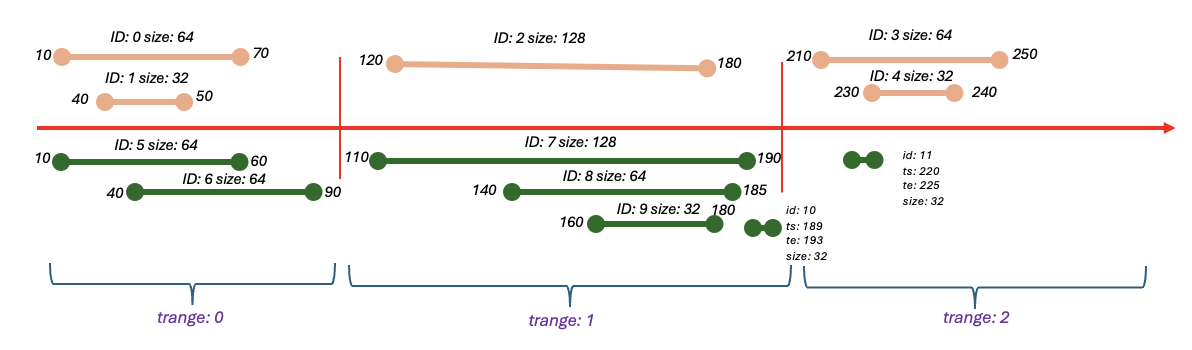

In [8]:

Image(filename =r'data.png')

## Visualization of traces as graph with ipycytoscape
* Nodes:  Events

* Edges: If two events have any overlapping time.

* Degree: Count of overlapping events

* Visualization filters: Nodes/Events with degree > 2 are "Red". Events with degree <= 2 are colored purple.

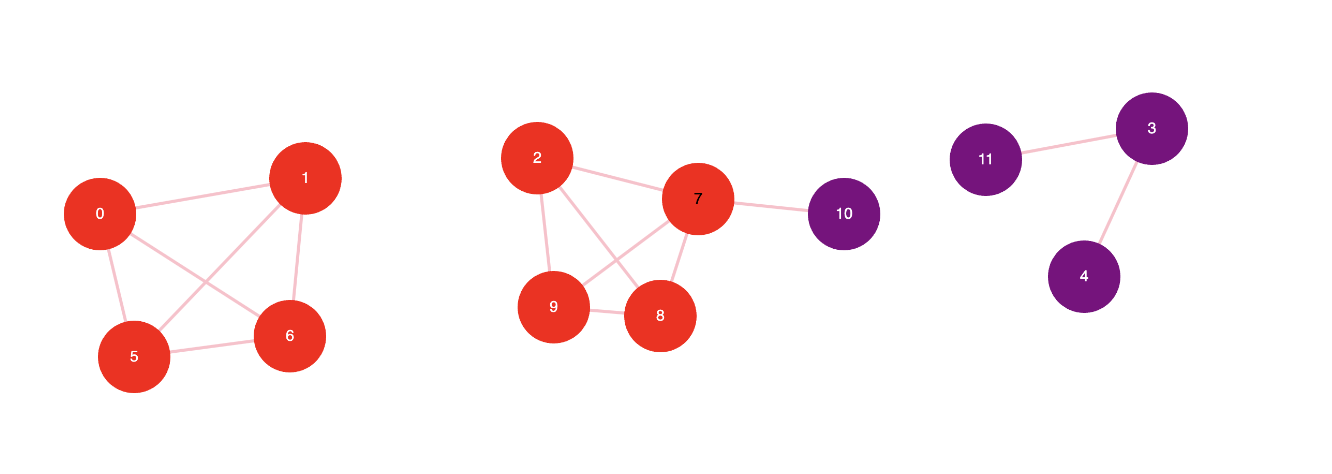

In [9]:
Image(filename =r'vis.png')